<a href="https://colab.research.google.com/github/Prashant-op/Appliance_Energy_Prediction/blob/main/Prashant_Bhardwaj_Appliances_Energy_Prediction_Capstone_Project_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Data-driven prediction of energy use of appliances`***

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.


Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes



    1. date time year-month-day hour:minute:second

    2. Appliances, energy use in Wh (Dependent variable) 
    3. lights, energy use of light fixtures in the house in Wh (Drop this column)

    4. T1, Temperature in kitchen area, in Celsius
    5. RH1, Humidity in kitchen area, in % 
    6. T2, Temperature in living room area, in Celsius 
    7. RH2, Humidity in living room area, in %
    8. T3, Temperature in laundry room area
    9. RH3, Humidity in laundry room area, in % 
    10. T4, Temperature in office room, in Celsius 
    11. RH4, Humidity in office room, in %
    12. T5, Temperature in bathroom, in 
    13. RH5, Humidity in bathroom, in % 
    14. T6, Temperature outside the building (north side), in Celsius
    15. RH6, Humidity outside the building (north side), in %
    16. T7, Temperature in ironing room , in Celsius
    17. RH7, Humidity in ironing room, in % 
    18. T8, Temperature in teenager room 2, in Celsius 
    19. RH8, Humidity in teenager room 2, in %
    20. T9, Temperature in parents room, in Celsius 
    21. RH9, Humidity in parents room, in % To, 
    22. Temperature outside (from Chievres weather station), in
    23. Celsius Pressure (from Chievres weather station), in mm Hg RHout, 
    24. Humidity outside (from Chievres weather station), in %
    25. Wind speed (from Chievres weather station), in m/s
    26. Visibility (from Chievres weather station), in km
    27. Tdewpoint (from Chievres weather station), Â°C
    28. rv1, Random variable 1, nondimensional
    29. rv2, Random variable 2, nondimensional


Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. 

Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


In [9]:
file1='/content/drive/MyDrive/Alma Better/Cohort Nilgiri/Module 5/Week 1/Day 2/data_application_energy.csv'

In [10]:
data = pd.read_csv(file1, parse_dates=['date'])

In [11]:
# Set datetime index due to time series analysis 
data = data.set_index('date')

In [12]:
data

Appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-11 17:00:00          60      30  ...  13.275433  13.275433
2016-01-11 17:10:00          60      30  ...  18.606195  18.606195
2016-01-11 17:20:00          50      30  ...  28.642668  28.642668
2016-01-11 17:30:00          50      40  ...  45.410389  45.410389
2016-01-11 17:40:00          60      40  ...  10.084097  10.084097
...                         ...     ...  ...        ...        ...
2016-05-27 17:20:00         100       0  ...  43.096812  43.096812
2016-05-27 17:30:00          90       0  ...  49.282940  49.282940
2016-05-27 17:40:00         270      10  ...  29.199117  29.199117
2016-05-27 17:50:00         420      10  ...   6.322784   6.322784
2016-05-27 18:00:00         430      10  ...  34.118851  34.118851

[19735 rows x 28 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

There is no null Value in our data set

In [14]:
data.describe

<bound method NDFrame.describe of                      Appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-11 17:00:00          60      30  ...  13.275433  13.275433
2016-01-11 17:10:00          60      30  ...  18.606195  18.606195
2016-01-11 17:20:00          50      30  ...  28.642668  28.642668
2016-01-11 17:30:00          50      40  ...  45.410389  45.410389
2016-01-11 17:40:00          60      40  ...  10.084097  10.084097
...                         ...     ...  ...        ...        ...
2016-05-27 17:20:00         100       0  ...  43.096812  43.096812
2016-05-27 17:30:00          90       0  ...  49.282940  49.282940
2016-05-27 17:40:00         270      10  ...  29.199117  29.199117
2016-05-27 17:50:00         420      10  ...   6.322784   6.322784
2016-05-27 18:00:00         430      10  ...  34.118851  34.118851

[19735 rows x 28 columns]>

In [15]:
data.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

In [16]:
data['Appliances'].median()

60.0

In [17]:
data.size

552580

In [18]:
data.shape

(19735, 28)

# ***`Renaming the columns`***

In [19]:
data.rename(columns={'T1':'Temp_Kitchen','RH_1': 'Humidity_Kitchen','T2':'Temp_Liv_Room','RH_2': 'Humidity_Liv_Room','T3':'Temp_Laundry','RH_3': 'Humidity_Laundry','T4':'Temp_Office_Room','RH_4': 'Humidity_Office_Room','T5':'Temp_Bathroom','RH_5': 'Humidity_Bathroom','T6':'Temp_Out_Building','RH_6': 'Humidity_Out_Building','T7':'Temp_Iron_Room','RH_7': 'Humidity_Iron_Room','T8':'Temp_Teenager_Room','RH_8': 'Humidity_Teenager_Room','T9':'Temp_Parents_Room','RH_9': 'Humidity_Parents_Room','T_out' : 'Temp_Outside','Press_mm_hg':'Pressure_Outside','RH_out'	:'Humidity_Outside'},inplace=True)

In [20]:
data.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

In [21]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(data.shape[0]))
print("Total number of columns = {}".format(data.columns.shape[0]))
print("Column wise count of null values:-")
print(data.isnull().sum())

Number of instances in dataset = 19735
Total number of columns = 28
Column wise count of null values:-
Appliances                0
lights                    0
Temp_Kitchen              0
Humidity_Kitchen          0
Temp_Liv_Room             0
Humidity_Liv_Room         0
Temp_Laundry              0
Humidity_Laundry          0
Temp_Office_Room          0
Humidity_Office_Room      0
Temp_Bathroom             0
Humidity_Bathroom         0
Temp_Out_Building         0
Humidity_Out_Building     0
Temp_Iron_Room            0
Humidity_Iron_Room        0
Temp_Teenager_Room        0
Humidity_Teenager_Room    0
Temp_Parents_Room         0
Humidity_Parents_Room     0
Temp_Outside              0
Pressure_Outside          0
Humidity_Outside          0
Windspeed                 0
Visibility                0
Tdewpoint                 0
rv1                       0
rv2                       0
dtype: int64



# ***`Therefore, we can conclude that the dataset has no missing values in any columns`***

# ***`Now i am splitting our data set.`***

In [22]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state = 1)

In [23]:
train_df

Appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-29 03:20:00          20       0  ...  15.371821  15.371821
2016-03-09 21:20:00         110      30  ...   5.367963   5.367963
2016-03-16 13:30:00          90       0  ...  15.911890  15.911890
2016-03-24 15:30:00          30       0  ...  45.922926  45.922926
2016-03-10 18:30:00         680      30  ...  49.505112  49.505112
...                         ...     ...  ...        ...        ...
2016-03-27 18:50:00         140       0  ...  33.139648  33.139648
2016-05-10 18:30:00         100       0  ...  48.667955  48.667955
2016-02-16 18:20:00          90       0  ...  35.089034  35.089034
2016-04-05 05:40:00          60       0  ...  39.268670  39.268670
2016-01-13 08:10:00          30       0  ...  34.481392  34.481392

[15788 rows x 28 columns]

In [24]:
test_df

Appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-14 02:10:00          50       0  ...  19.215195  19.215195
2016-04-11 22:20:00          60      20  ...  17.428107  17.428107
2016-05-24 20:10:00         100       0  ...  20.378018  20.378018
2016-02-13 09:20:00         130       0  ...  22.965252  22.965252
2016-02-17 16:00:00          60       0  ...  43.534302  43.534302
...                         ...     ...  ...        ...        ...
2016-03-21 17:50:00          40      20  ...  43.005532  43.005532
2016-03-07 06:40:00          50       0  ...  38.886617  38.886617
2016-02-20 19:10:00         200       0  ...  49.698116  49.698116
2016-01-13 09:00:00         400      20  ...  15.322163  15.322163
2016-05-16 20:20:00         130       0  ...  48.132010  48.132010

[3947 rows x 28 columns]

In [25]:
train_df.shape

(15788, 28)

In [26]:
test_df.shape

(3947, 28)

# ***`1.Exploratory Analysis`***


### ***`Column wise statistics`***

In [27]:
# Columns for temperature sensors
temp_cols = ["Temp_Kitchen","Temp_Liv_Room"	,"Temp_Laundry","Temp_Office_Room",	"Temp_Bathroom","Temp_Out_Building","Temp_Iron_Room",	"Temp_Teenager_Room",		"Temp_Parents_Room"]

# Columns for humidity sensors
rho_cols = ["Humidity_Kitchen","Humidity_Liv_Room","Humidity_Laundry","Humidity_Office_Room","Humidity_Bathroom","Humidity_Out_Building","Humidity_Iron_Room","Humidity_Teenager_Room","Humidity_Parents_Room"]

# Columns for weather data
weather_cols = ["Temp_Outside",	"Pressure_Outside",	"Humidity_Outside", "Tdewpoint",  "Windspeed", "Visibility"]

# Target variable column
target = ["Appliances"]

In [28]:
train_df[temp_cols].describe()

Temp_Kitchen  Temp_Liv_Room  ...  Temp_Teenager_Room  Temp_Parents_Room
count  15788.000000   15788.000000  ...        15788.000000       15788.000000
mean      21.691460      20.345048  ...           22.030234          19.493662
std        1.605651       2.191295  ...            1.954342           2.013427
min       16.790000      16.100000  ...           16.306667          14.890000
25%       20.760000      18.790000  ...           20.790000          18.033333
50%       21.600000      20.000000  ...           22.113889          19.390000
75%       22.633333      21.500000  ...           23.390000          20.600000
max       26.260000      29.856667  ...           27.230000          24.500000

[8 rows x 9 columns]

In [29]:
train_df[rho_cols].describe()

Humidity_Kitchen  ...  Humidity_Parents_Room
count      15788.000000  ...           15788.000000
mean          40.244406  ...              41.512784
std            3.965327  ...               4.138144
min           27.023333  ...              29.166667
25%           37.345000  ...              38.500000
50%           39.626667  ...              40.832667
75%           43.030000  ...              44.290000
max           63.360000  ...              53.326667

[8 rows x 9 columns]

In [30]:
train_df[weather_cols].describe()

Temp_Outside  Pressure_Outside  ...     Windspeed    Visibility
count  15788.000000      15788.000000  ...  15788.000000  15788.000000
mean       7.429348        755.542977  ...      4.051842     38.368239
std        5.309326          7.373836  ...      2.452512     11.769272
min       -5.000000        729.300000  ...      0.000000      1.000000
25%        3.700000        751.000000  ...      2.000000     29.000000
50%        6.950000        756.100000  ...      3.666667     40.000000
75%       10.433333        760.900000  ...      5.500000     40.000000
max       26.100000        772.300000  ...     14.000000     66.000000

[8 rows x 6 columns]

In [31]:
train_df[target].describe()

Appliances
count  15788.000000
mean      97.110464
std      101.933540
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [32]:
train_df.apply(lambda x: len(x.unique()))

Appliances                   92
lights                        8
Temp_Kitchen                640
Humidity_Kitchen           2294
Temp_Liv_Room              1437
Humidity_Liv_Room          2923
Temp_Laundry               1249
Humidity_Laundry           2298
Temp_Office_Room           1231
Humidity_Office_Room       2663
Temp_Bathroom              1970
Humidity_Bathroom          6447
Temp_Out_Building          3870
Humidity_Out_Building      8443
Temp_Iron_Room             1763
Humidity_Iron_Room         5077
Temp_Teenager_Room         1988
Humidity_Teenager_Room     5669
Temp_Parents_Room           845
Humidity_Parents_Room      2961
Temp_Outside               1653
Pressure_Outside           2064
Humidity_Outside            538
Windspeed                   176
Visibility                  392
Tdewpoint                  1353
rv1                       15788
rv2                       15788
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


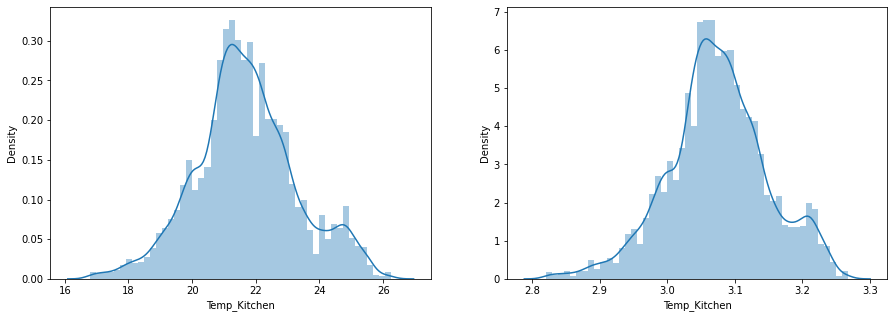

In [33]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_df["Temp_Kitchen"], ax=axes[0])
sns.distplot(np.log(train_df.Temp_Kitchen), ax=axes[1])


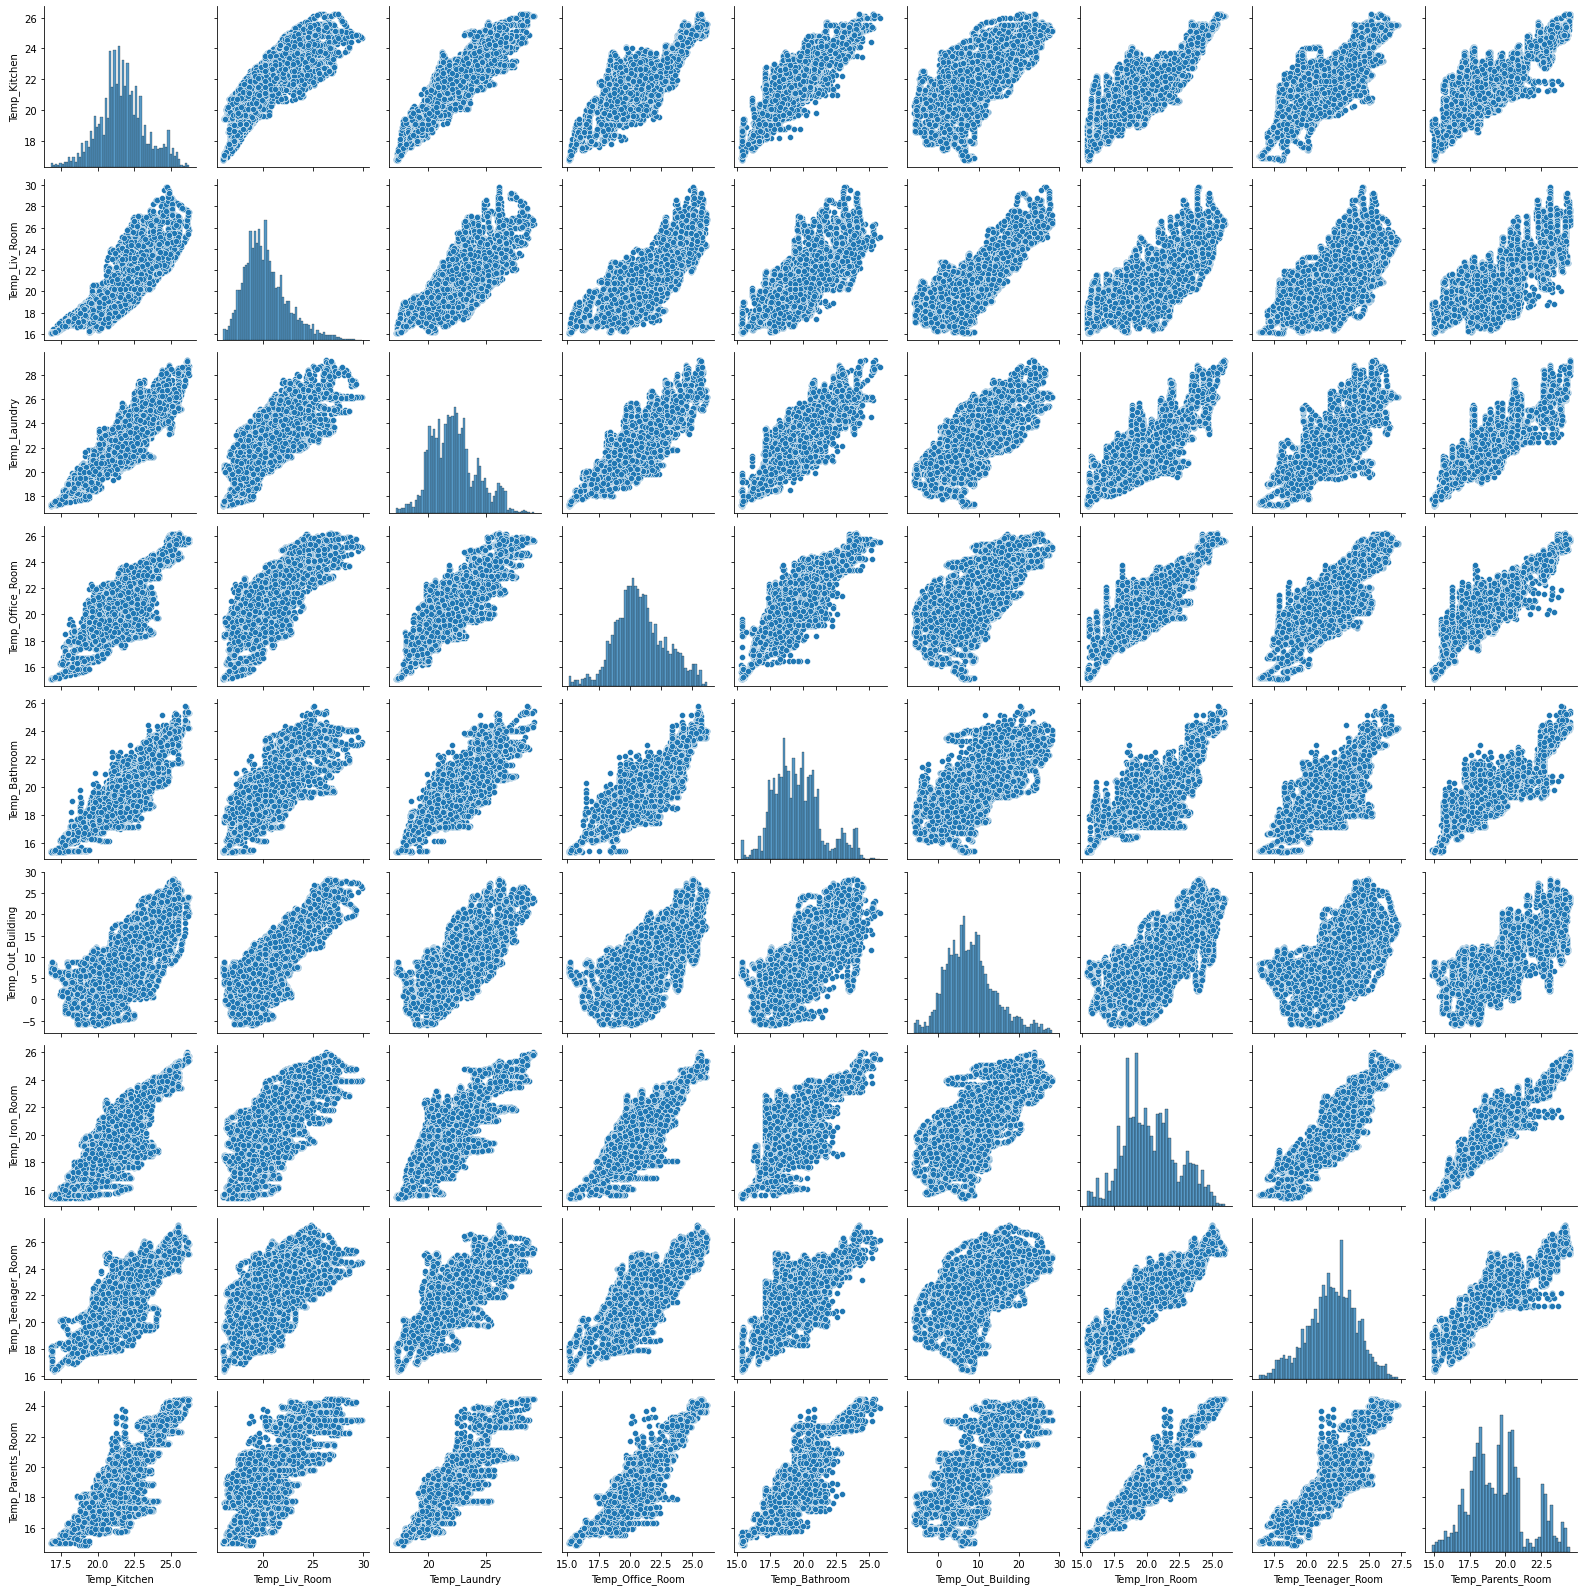

In [34]:
sns.pairplot(train_df[temp_cols])

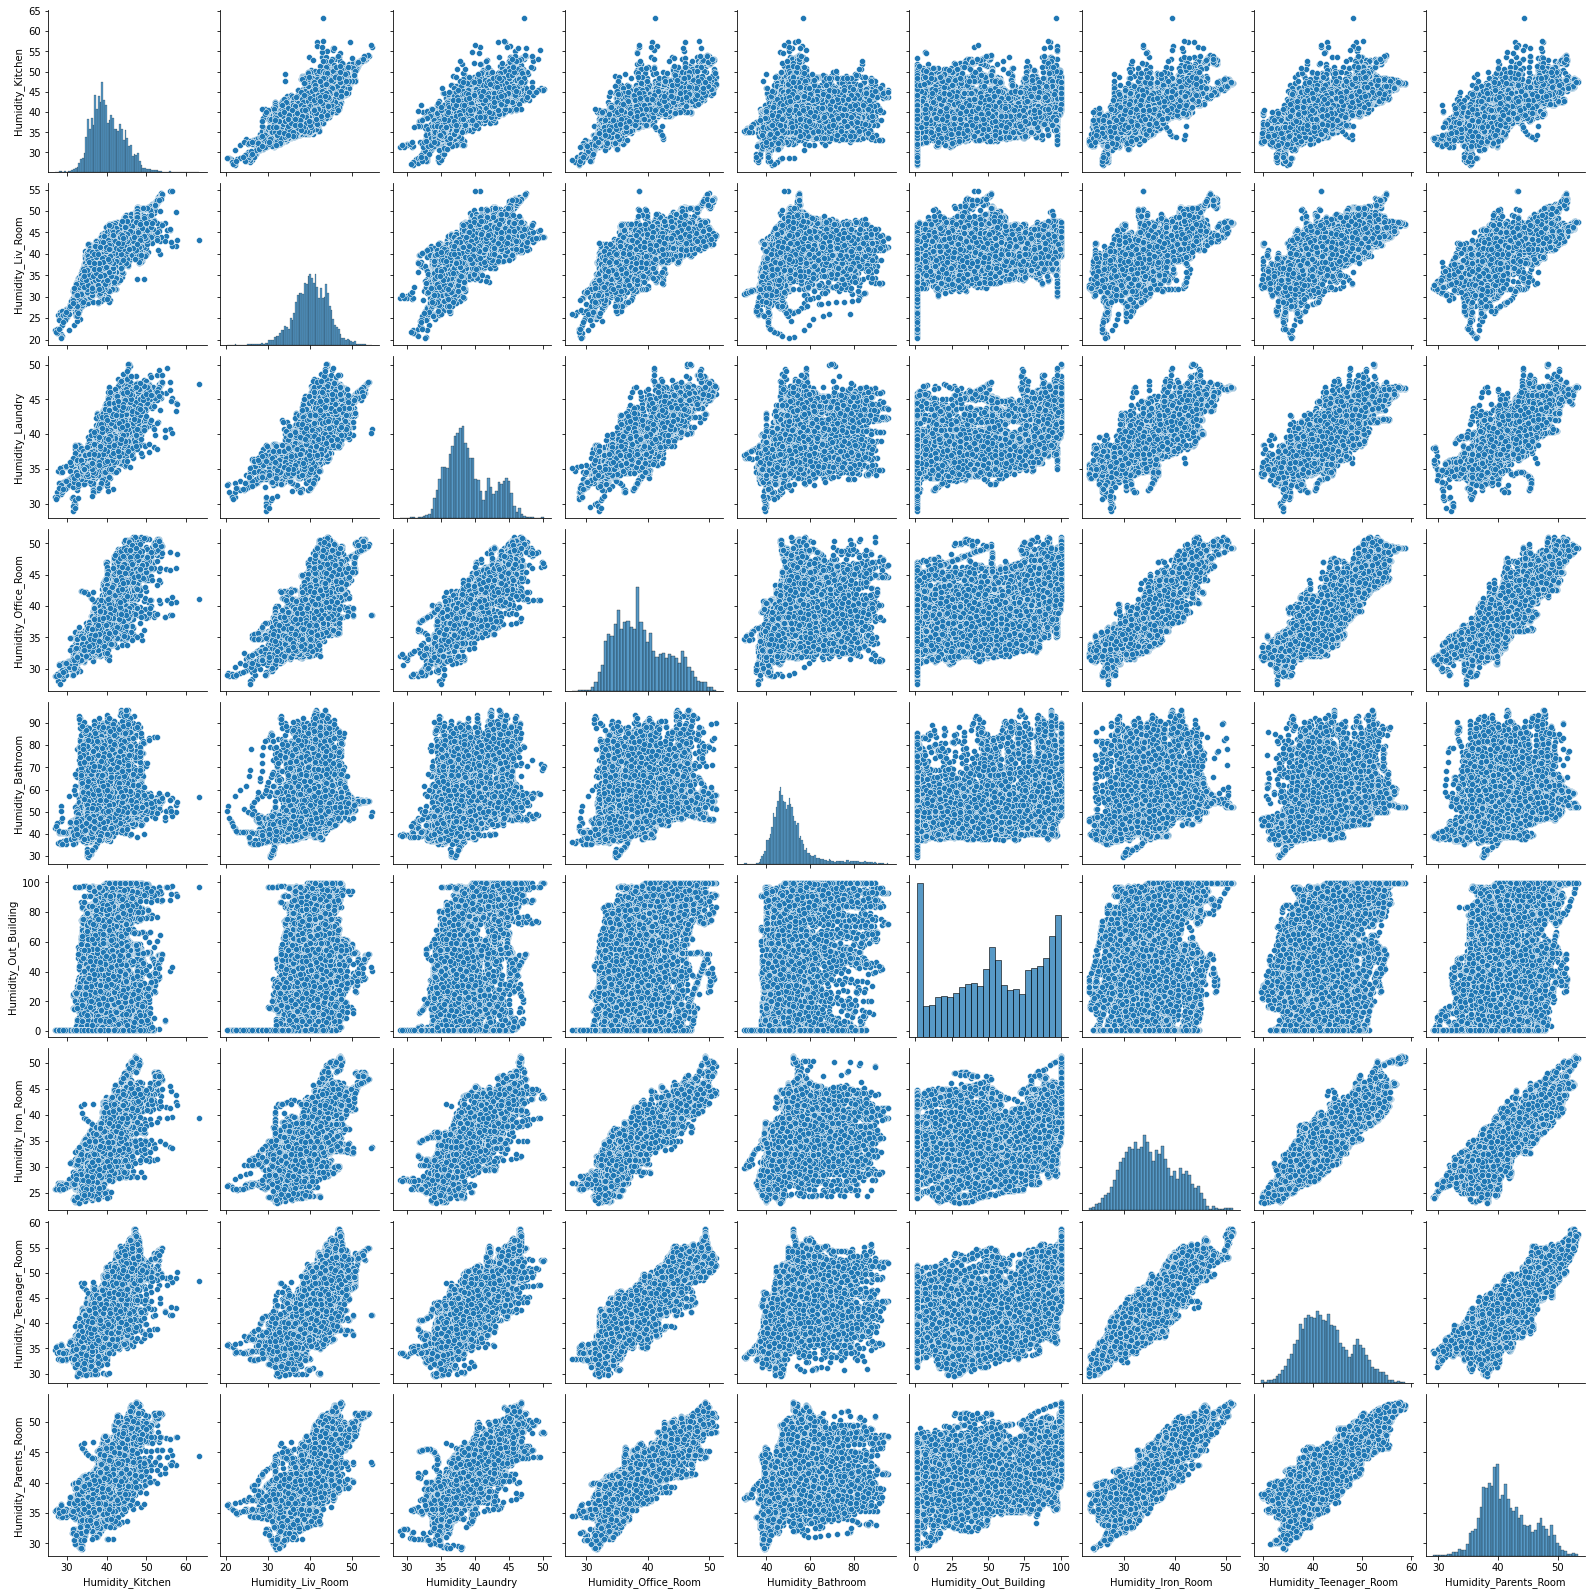

In [35]:
sns.pairplot(train_df[rho_cols])

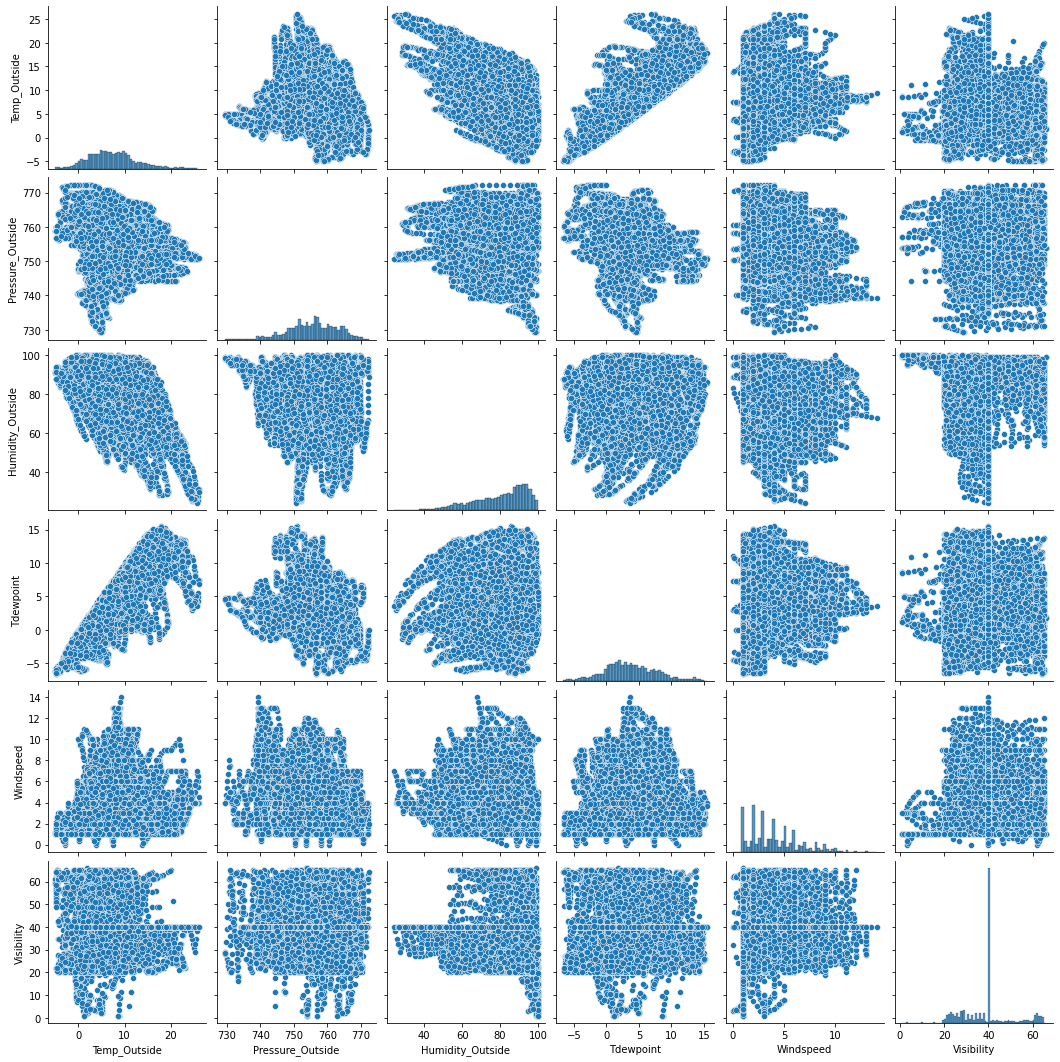

In [36]:
sns.pairplot(train_df[weather_cols])

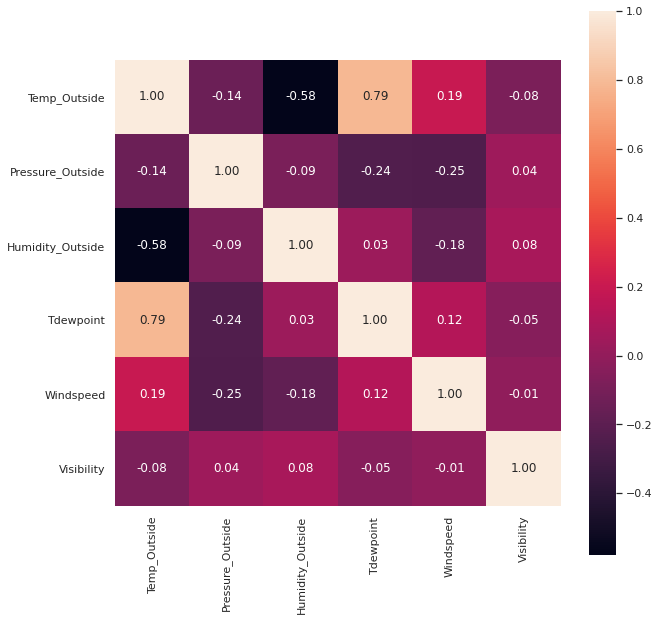

In [37]:
# Pearson Correlation among the variables
corr = train_df[weather_cols].corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=weather_cols, yticklabels=weather_cols)
plt.show();

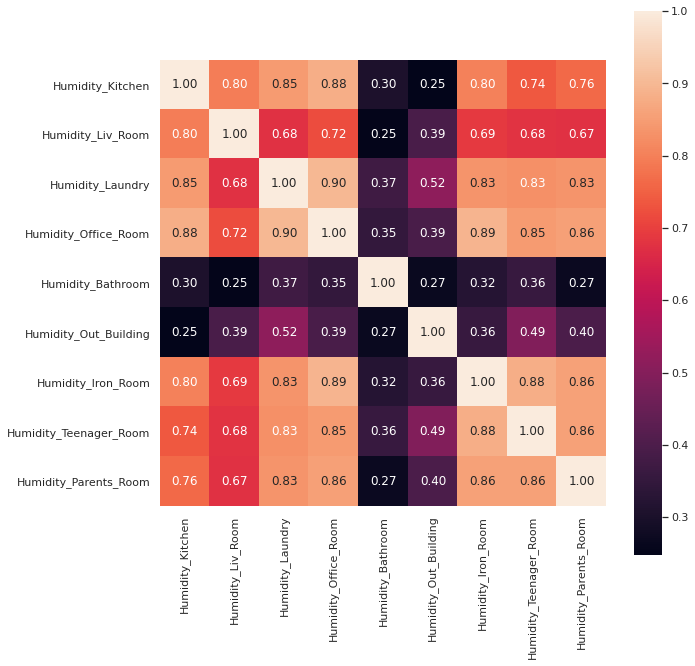

In [38]:
# Pearson Correlation among the variables
corr = train_df[rho_cols].corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=rho_cols, yticklabels=rho_cols)
plt.show();

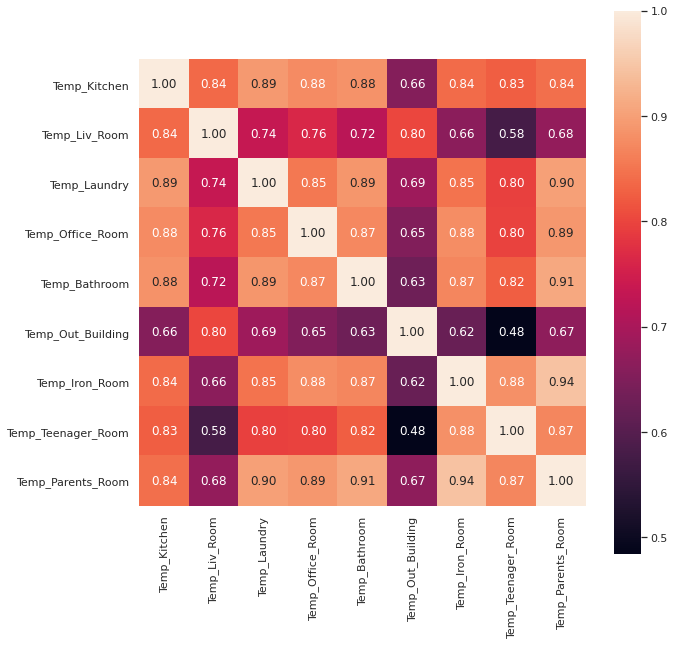

In [39]:
# Pearson Correlation among the variables
corr = train_df[temp_cols].corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=temp_cols, yticklabels=temp_cols)
plt.show();

In [40]:
train_df.drop(columns='lights',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
train_df.drop(columns=['rv1','rv2'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


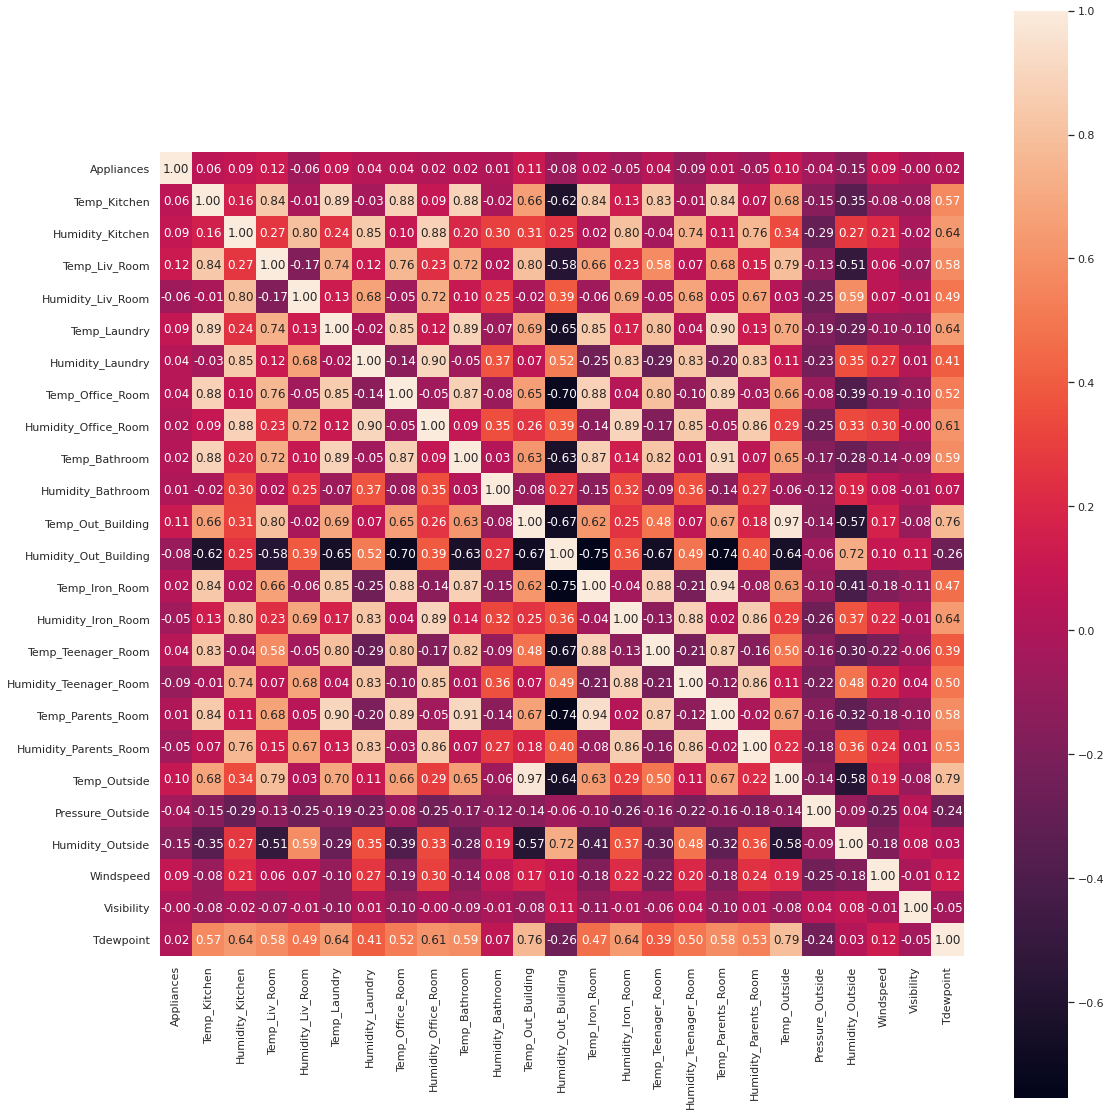

In [42]:
corr = train_df.corr()
plt.figure(figsize = (18,20))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f')
plt.show();

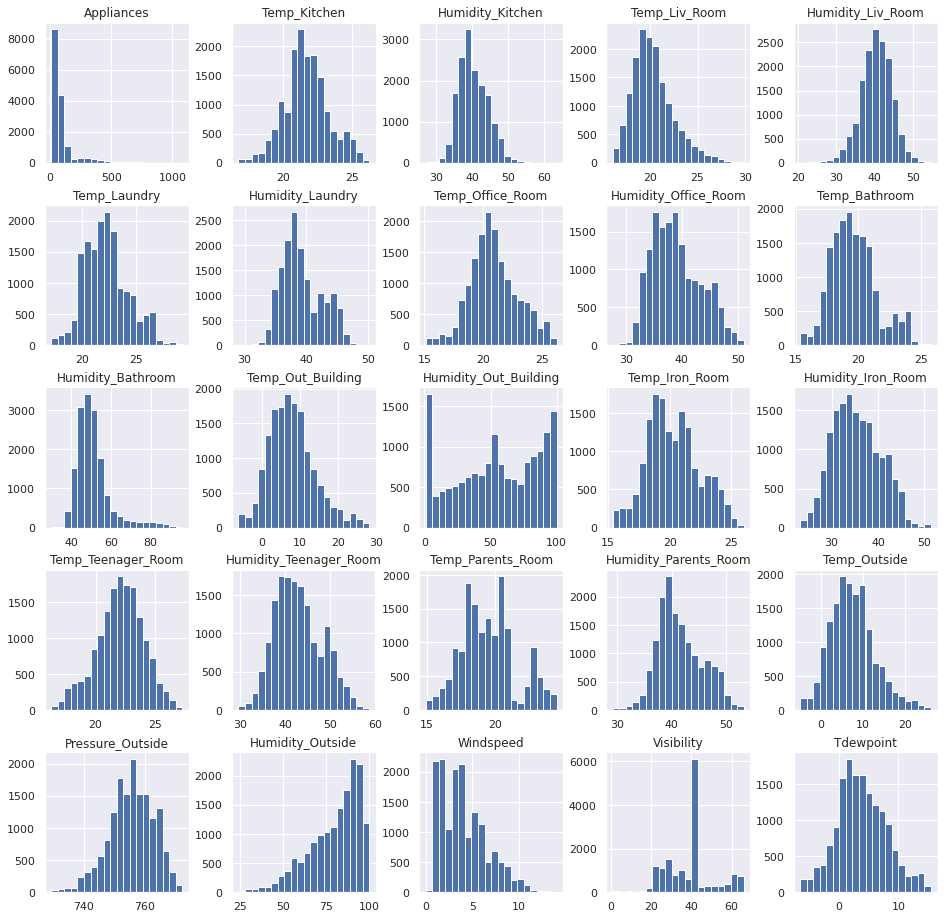

In [43]:

histograms = train_df.hist(figsize=(16, 16), bins=20)

All humidity values except  Humidity out building   and humidity outside follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.


Similarly, all temperature readings follow a Normal distribution except for Temp_parent_room.
Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.


Also, there is no similarity between our target variable, Appliances and the remaining 24 columns. Windspeed looks similar but the number of observations are different as seen from the y-axes of both plots.

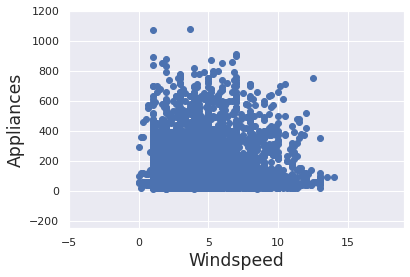

In [44]:
#Let's confirm this by plotting Appliances against Windspeed. Also, let's plot Appliances histogram separately to get better idea about it's distribution
plt.xlabel("Windspeed", fontsize='x-large')
plt.ylabel("Appliances", fontsize='x-large')

plt.xlim(-5, train_df.Windspeed.max() + 5)
plt.ylim(-250, 1200)

plt.scatter(train_df["Windspeed"], train_df["Appliances"])


Hence, it is confirmed that Windspeed does not share a linear relationship with Appliances column.

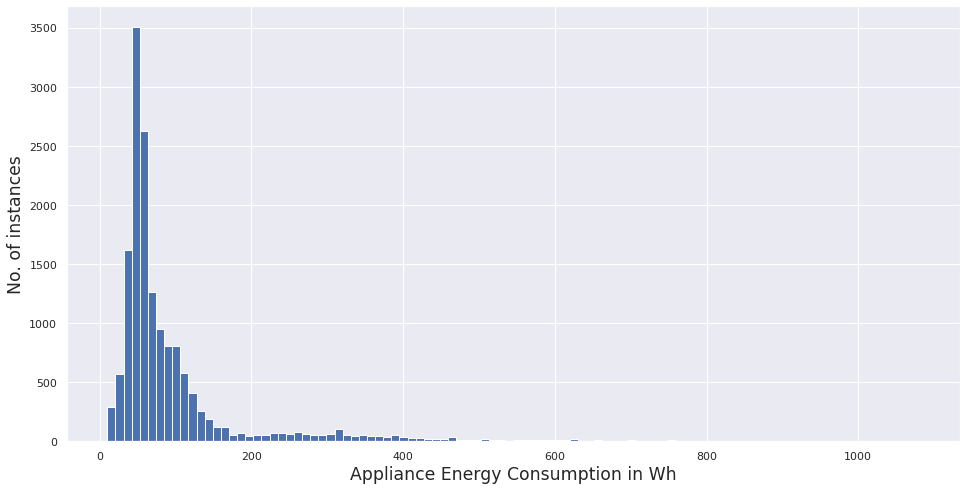

In [45]:
# Histogram for appliances

plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")

train_df["Appliances"].hist(figsize=(16, 8), bins=100)

We can see that most values are in the range of 0-200 Wh, strengthening our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below

In [46]:

print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format((train_df[train_df.Appliances <= 200]["Appliances"].count()*100.0) / train_df.shape[0]))

Percentage of dataset in range of 0-200 Wh
90.455%


In [47]:
train_df.head(1)

Appliances  Temp_Kitchen  ...  Visibility  Tdewpoint
date                                           ...                       
2016-01-29 03:20:00          20          18.5  ...        40.0        0.9

[1 rows x 25 columns]

Now let's check the correlation between T7 and T9


In [48]:

# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(train_df["Temp_Iron_Room"], train_df["Temp_Parents_Room"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9447501239009546
p-value : 0.0


We can see that there is a very high degree of positive correlation between this two columns. Also, p-value is less than 0.01. Thereofore, we can reject the null hypothesis that this two columns don't affect each other.

In [49]:
# Create a new feature which is temperature of House and Humidity of House
train_df['temp_House']=(train_df.Temp_Kitchen +train_df.Temp_Bathroom +train_df.Temp_Iron_Room +train_df.Temp_Laundry +train_df.Temp_Liv_Room +train_df.Temp_Parents_Room +train_df.Temp_Teenager_Room +train_df.Temp_Office_Room)/8
train_df['Humidity_House']=(train_df.Humidity_Kitchen +train_df.Humidity_Bathroom +train_df.Humidity_Iron_Room +train_df.Humidity_Laundry +train_df.Humidity_Liv_Room +train_df.Humidity_Parents_Room +train_df.Humidity_Teenager_Room +train_df.Humidity_Office_Room)/8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
train_df

Appliances  Temp_Kitchen  ...  temp_House  Humidity_House
date                                           ...                            
2016-01-29 03:20:00          20     18.500000  ...   17.641667       43.914375
2016-03-09 21:20:00         110     21.000000  ...   19.642917       41.736667
2016-03-16 13:30:00          90     21.230000  ...   20.733750       36.396042
2016-03-24 15:30:00          30     21.100000  ...   20.446250       38.909583
2016-03-10 18:30:00         680     21.290000  ...   20.270833       38.033333
...                         ...           ...  ...         ...             ...
2016-03-27 18:50:00         140     22.666667  ...   21.714583       38.649167
2016-05-10 18:30:00         100     25.356667  ...   25.236320       50.203839
2016-02-16 18:20:00          90     21.500000  ...   20.372083       33.906250
2016-04-05 05:40:00          60     22.100000  ...   21.830104       46.011042
2016-01-13 08:10:00          30     18.790000  ...   18.268750       46.653958

[15788 rows x 27 columns]

In [51]:
train_df.describe()

Appliances  Temp_Kitchen  ...    temp_House  Humidity_House
count  15788.000000  15788.000000  ...  15788.000000    15788.000000
mean      97.110464     21.691460  ...     20.820877       41.194826
std      101.933540      1.605651  ...      1.811435        3.962181
min       10.000000     16.790000  ...     16.012708       30.842798
25%       50.000000     20.760000  ...     19.672882       38.349244
50%       60.000000     21.600000  ...     20.603437       40.551155
75%      100.000000     22.633333  ...     21.771250       44.106432
max     1080.000000     26.260000  ...     26.061940       53.947153

[8 rows x 27 columns]

In [52]:
corr = train_df.corr().round(2)
corr

Appliances  Temp_Kitchen  ...  temp_House  Humidity_House
Appliances                    1.00          0.06  ...        0.05           -0.02
Temp_Kitchen                  0.06          1.00  ...        0.95            0.05
Humidity_Kitchen              0.09          0.16  ...        0.14            0.87
Temp_Liv_Room                 0.12          0.84  ...        0.81            0.13
Humidity_Liv_Room            -0.06         -0.01  ...       -0.01            0.78
Temp_Laundry                  0.09          0.89  ...        0.94            0.09
Humidity_Laundry              0.04         -0.03  ...       -0.12            0.90
Temp_Office_Room              0.04          0.88  ...        0.94           -0.05
Humidity_Office_Room          0.02          0.09  ...        0.01            0.92
Temp_Bathroom                 0.02          0.88  ...        0.94            0.09
Humidity_Bathroom             0.01         -0.02  ...       -0.07            0.59
Temp_Out_Building             0.11          0.66  ...        0.71            0.13
Humidity_Out_Building        -0.08         -0.62  ...       -0.73            0.45
Temp_Iron_Room                0.02          0.84  ...        0.94           -0.14
Humidity_Iron_Room           -0.05          0.13  ...        0.08            0.91
Temp_Teenager_Room            0.04          0.83  ...        0.89           -0.17
Humidity_Teenager_Room       -0.09         -0.01  ...       -0.07            0.90
Temp_Parents_Room             0.01          0.84  ...        0.95           -0.07
Humidity_Parents_Room        -0.05          0.07  ...        0.02            0.87
Temp_Outside                  0.10          0.68  ...        0.72            0.17
Pressure_Outside             -0.04         -0.15  ...       -0.15           -0.26
Humidity_Outside             -0.15         -0.35  ...       -0.39            0.43
Windspeed                     0.09         -0.08  ...       -0.14            0.23
Visibility                   -0.00         -0.08  ...       -0.10            0.00
Tdewpoint                     0.02          0.57  ...        0.59            0.54
temp_House                    0.05          0.95  ...        1.00           -0.01
Humidity_House               -0.02          0.05  ...       -0.01            1.00

[27 rows x 27 columns]

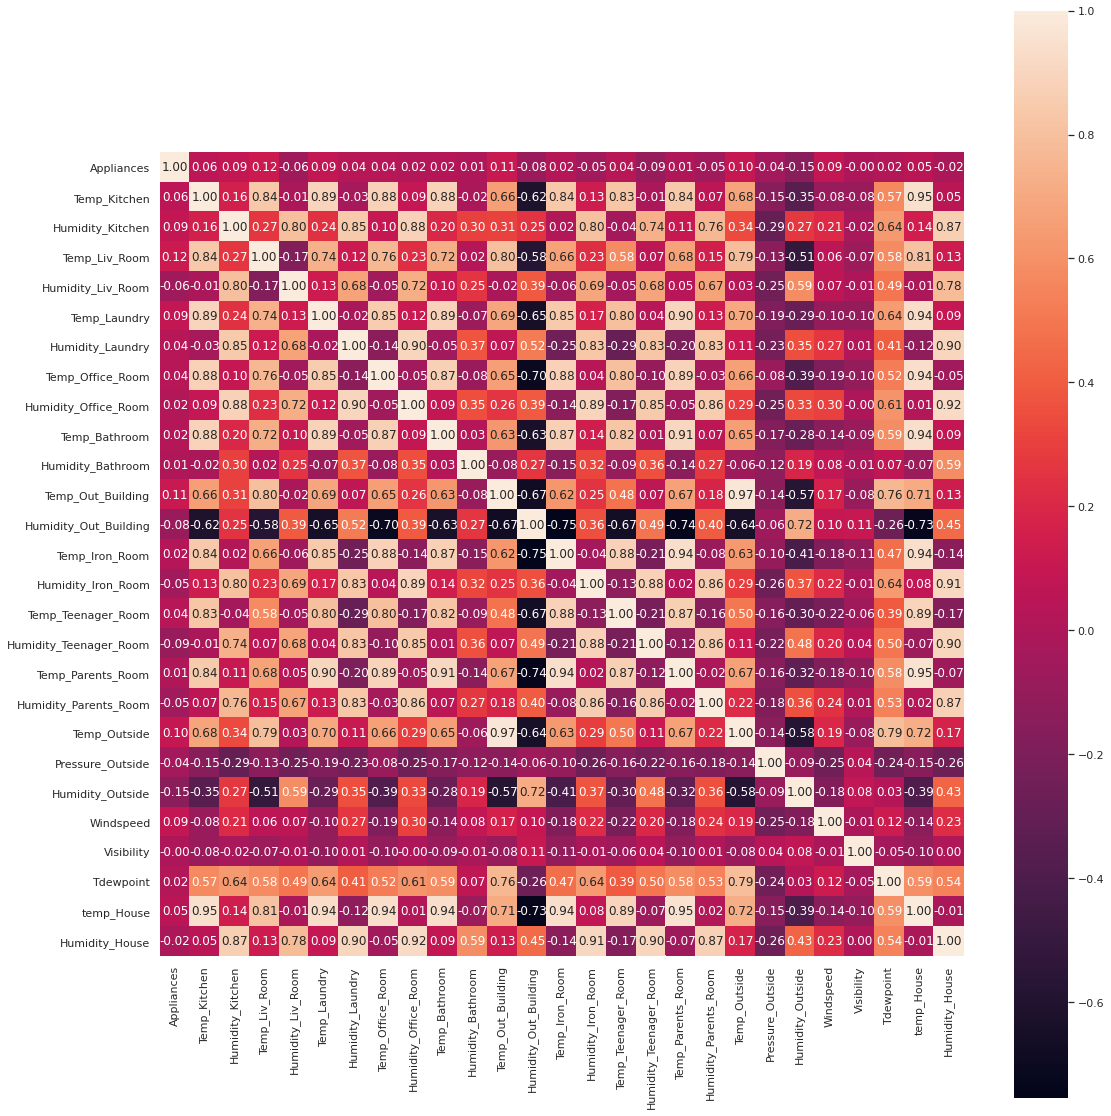

In [53]:
corr = train_df.corr()
plt.figure(figsize = (18,20))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f')
plt.show();

In [54]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
calc_vif(train_df[[i for i in train_df.describe().columns if i not in ['Appliances',"Temp_Kitchen"	,"Temp_Laundry","Temp_Office_Room",	"Temp_Bathroom","Temp_Iron_Room",	"Temp_Teenager_Room",		"Temp_Parents_Room","Humidity_Kitchen","Humidity_Liv_Room","Humidity_Laundry","Humidity_Office_Room","Humidity_Bathroom","Humidity_Out_Building","Humidity_Iron_Room","Humidity_Teenager_Room","Humidity_Parents_Room",]]])

variables          VIF
0      Temp_Liv_Room   457.925079
1  Temp_Out_Building    62.567467
2       Temp_Outside   309.477056
3   Pressure_Outside  1678.859868
4   Humidity_Outside   949.985513
5          Windspeed     4.873375
6         Visibility    11.880398
7          Tdewpoint   107.669951
8         temp_House   565.050787
9     Humidity_House   278.869004

Check for outliers: We will consider as outliers the 0,1% top values of appliances' load because it is fact that recordings of power load higher than 800Wh from a house appliance are not logical. These may be false recordings caused by an instant fault on the recording devices. Additionally, in this data set there are not any NA values.

The number of the 0,1% top values of appliances' load is 15 and they have power load higher than 780 Wh.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


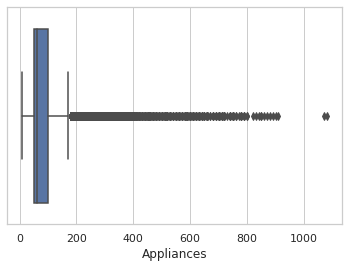

In [56]:
# Find outliers
sorted_appliances = train_df.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliance
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.Appliances)

In [57]:
# Outliers removal

train_df = train_df.dropna()
train_df = train_df.drop(train_df[(train_df.Appliances>140)|(train_df.Appliances<0)].index)

The idea is that appliances' load is hour, day, week, month dependent. It is logical assumption that in night hours the load is low or at weekends the energy consumption is higher than the weekdays because more people are at home.

Additionaly, it is expected a correlation between temperature/humidity and energy load. For instance, when someone cooks(higher consumption) probably the temperature in the kichen raises.

Moreover, we can use qualitative predictors to indicate if a mesured load is lower or higher in comparison to the average energy load a given time interval.

I will append several columns as new features to the original data, based on the above-mentioned assumptions and then i will find out which of them explain better appliances consumption.

In [58]:
# Append more columns to the DataFrame based on datetime
train_df['month'] = train_df.index.month
train_df['weekday'] = train_df.index.weekday
train_df['hour'] = train_df.index.hour
train_df['week'] = train_df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [59]:
train_df.head(1)

Appliances  Temp_Kitchen  ...  hour  week
date                                           ...            
2016-01-29 03:20:00          20          18.5  ...     3     4

[1 rows x 31 columns]

In [60]:
train_df['log_appliances'] = np.log(train_df.Appliances)



In [61]:
# Calculate average energy load per weekday and hour
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

# Average energy consumption per weekday and hour
train_df['weekday_avg'] = list(map(code_mean(train_df[:], 'weekday', "Appliances").get, train_df.weekday))
train_df['hour_avg'] = list(map(code_mean(train_df[:], 'hour', "Appliances").get, train_df.hour))


We will use smaller data sets in 30 minitues and 1 hour basis instead of 10 minutes to reduce noice

In [62]:

# Data sets in 30 minitues and 1 hour basis

df_hour = train_df.resample('1H').mean()
df_30min =train_df.resample('30min').mean()

In [63]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

train_df['low_consum'] = (train_df.Appliances+25<(train_df.hour_avg))*1
train_df['high_consum'] = (train_df.Appliances+100>(train_df.hour_avg))*1

df_hour['low_consum'] = (df_hour.Appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.Appliances+25>(df_hour.hour_avg))*1
df_30min['low_consum'] = (df_30min.Appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.Appliances+35>(df_30min.hour_avg))*1

Text(0, 0.5, 'Appliances consumption in Wh')

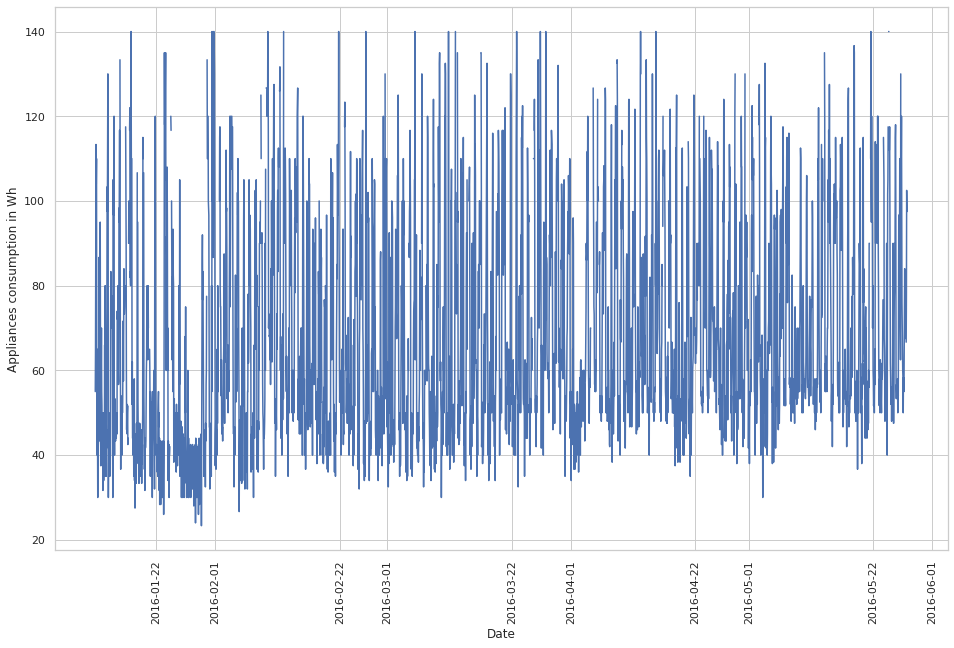

In [64]:

plt.figure(figsize=(16,10))
plt.plot(df_hour.Appliances)
plt.xticks( rotation='90')
plt.xlabel('Date')
plt.ylabel('Appliances consumption in Wh')

In [65]:
round(df_hour.groupby('hour')['Appliances'].describe())

count   mean   std   min   25%    50%    75%    max
hour                                                     
0.0   137.0   51.0   8.0  27.0  46.0   52.0   57.0   73.0
1.0   137.0   51.0   7.0  30.0  46.0   52.0   55.0   72.0
2.0   137.0   49.0   7.0  32.0  45.0   50.0   54.0   68.0
3.0   137.0   48.0   8.0  26.0  42.0   50.0   54.0   68.0
4.0   137.0   49.0   7.0  30.0  45.0   50.0   54.0   66.0
5.0   137.0   50.0   9.0  34.0  43.0   50.0   55.0   88.0
6.0   137.0   53.0  12.0  26.0  44.0   50.0   60.0   90.0
7.0   135.0   58.0  13.0  28.0  49.0   57.0   65.0  113.0
8.0   134.0   64.0  20.0  28.0  50.0   60.0   75.0  140.0
9.0   134.0   68.0  22.0  30.0  53.0   65.0   82.0  140.0
10.0  127.0   71.0  23.0  28.0  55.0   68.0   86.0  140.0
11.0  123.0   70.0  23.0  30.0  51.0   63.0   88.0  133.0
12.0  128.0   75.0  24.0  30.0  55.0   70.0   95.0  140.0
13.0  121.0   73.0  23.0  32.0  54.0   70.0   87.0  130.0
14.0  127.0   72.0  24.0  28.0  52.0   68.0   88.0  135.0
15.0  131.0   74.0  25.0  23.0  52.0   70.0   91.0  140.0
16.0  130.0   78.0  25.0  30.0  58.0   78.0   95.0  140.0
17.0  124.0   84.0  25.0  30.0  65.0   87.0  104.0  140.0
18.0  122.0   99.0  24.0  28.0  90.0  102.0  115.0  140.0
19.0  134.0  102.0  22.0  33.0  94.0  107.0  117.0  140.0
20.0  132.0  102.0  22.0  30.0  92.0  104.0  117.0  140.0
21.0  137.0   84.0  22.0  32.0  68.0   83.0  100.0  133.0
22.0  137.0   63.0  15.0  30.0  52.0   60.0   70.0  115.0
23.0  137.0   54.0  11.0  32.0  46.0   55.0   60.0  105.0

In [66]:
# Functions to be used from the plots

def daily(x,df=train_df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=train_df):
    return df.groupby('hour')[x].mean()

def monthly_daily(x,df=train_df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)



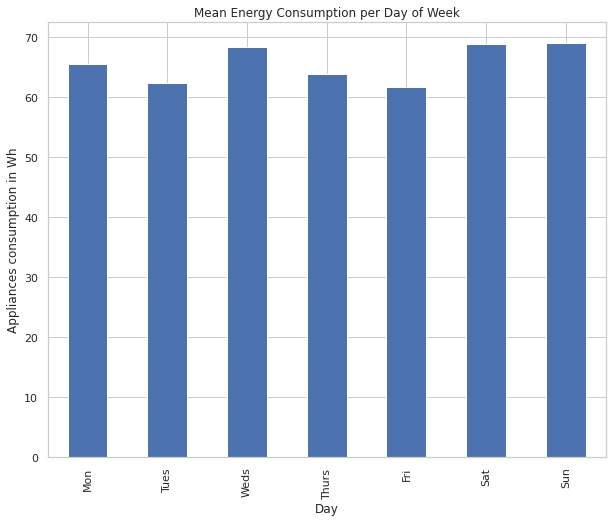

In [67]:
# Plot of Mean Energy Consumption per Day of Week

daily('Appliances').plot(kind = 'bar', figsize=(10,8))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);


The power load is a bit higher on Monday ,Friday, Saturday and Sunday than the other days.

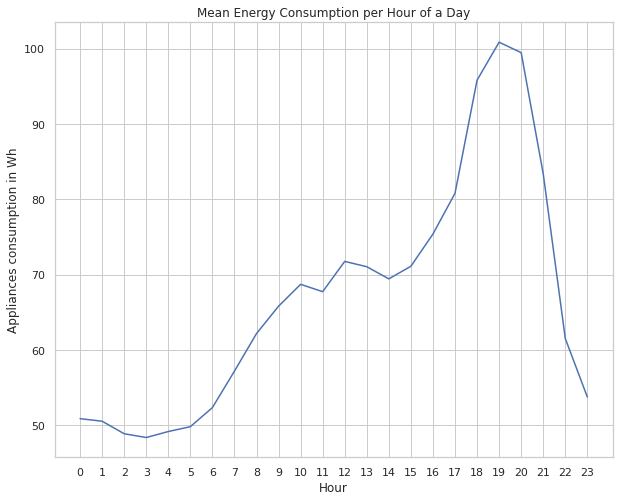

In [68]:
# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

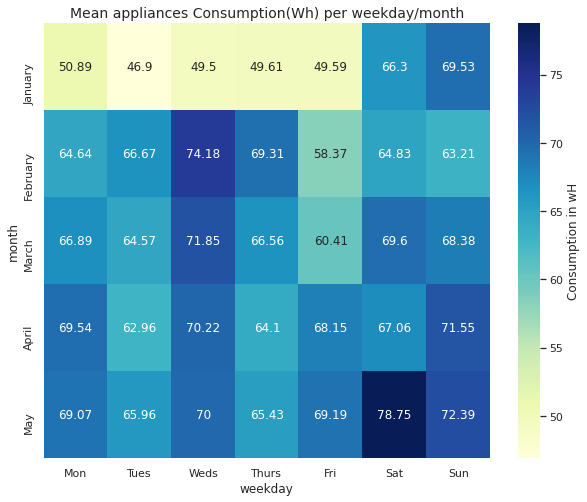

In [69]:
# Heatmap: Mean consumption per Weekday of Month
sns.set(rc={'figure.figsize':(10,8)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()


We can see from the heatmap above that the assumption that more power is consumed on Monday ,Friday, Saturday and Sunday is valid for each month. However, in our data set we have only 4,5 months and threfore we cannot use months as feature for our model

# ***`Train 3 different models on the data`***

In [70]:
for cat_feature in ['weekday', 'hour']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_feature])], axis=1)

Set-up the 3 models to be trained.

For the linear regression model, i choosed independent features but highly correlated with appliances' consumption, based on Pearson correlation plus the 2 qualitative predictors 'low_consum','high_consum'.

For the SVR model i choosed variables based on the results of the above-mentioned random forest model plus the 2 qualitative predictors.

For the random forest model i choosed a combination of viarables with the best results after several tryouts, based on the linearity and correlation assumptions.

In addition, from the 3 data sets with time interval 10 minutes, 30 minutes, 1 hour respectively, i choosed the last one because it has the best results, less noise and also it makes more sense to predict the energy consumption in hour terms.

In [71]:

# Linear model
model1_test = ['hour','Temp_Out_Building',	'Humidity_Out_Building'	,'Windspeed']

#SVR model
model2_test=['hour', 'low_consum', 'high_consum','Temp_Kitchen',	'Humidity_Kitchen',	'Temp_Liv_Room',	'Humidity_Liv_Room',	'Temp_Laundry',	'Humidity_Laundry',	'Temp_Office_Room',	'Humidity_Office_Room',	'Temp_Bathroom',	'Humidity_Bathroom',	'Temp_Out_Building',	'Humidity_Out_Building',	'Temp_Iron_Room',	'Humidity_Iron_Room',	'Temp_Teenager_Room',	'Humidity_Teenager_Room',	'Temp_Parents_Room',	'Humidity_Parents_Room',	'Temp_Outside',	'Pressure_Outside',	'Humidity_Outside',	'Windspeed',	'Visibility',	'Tdewpoint']

# RF model
model3_test = ['low_consum','high_consum','hour','Temp_Out_Building',	'Humidity_Out_Building'	,'Tdewpoint','Visibility','Pressure_Outside','Windspeed']

In [72]:
df_hour.hour = df_hour.hour.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)

In [73]:
test_df

Appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-14 02:10:00          50       0  ...  19.215195  19.215195
2016-04-11 22:20:00          60      20  ...  17.428107  17.428107
2016-05-24 20:10:00         100       0  ...  20.378018  20.378018
2016-02-13 09:20:00         130       0  ...  22.965252  22.965252
2016-02-17 16:00:00          60       0  ...  43.534302  43.534302
...                         ...     ...  ...        ...        ...
2016-03-21 17:50:00          40      20  ...  43.005532  43.005532
2016-03-07 06:40:00          50       0  ...  38.886617  38.886617
2016-02-20 19:10:00         200       0  ...  49.698116  49.698116
2016-01-13 09:00:00         400      20  ...  15.322163  15.322163
2016-05-16 20:20:00         130       0  ...  48.132010  48.132010

[3947 rows x 28 columns]

In [74]:
# Append more columns to the DataFrame based on datetime
test_df['month'] = test_df.index.month
test_df['weekday'] = test_df.index.weekday
test_df['hour'] = test_df.index.hour
test_df['week'] = test_df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [75]:
# Create a new feature which is temperature of House and Humidity of House
test_df['temp_House']=(test_df.Temp_Kitchen +test_df.Temp_Bathroom +test_df.Temp_Iron_Room +test_df.Temp_Laundry +test_df.Temp_Liv_Room +test_df.Temp_Parents_Room +test_df.Temp_Teenager_Room +test_df.Temp_Office_Room)/8
test_df['Humidity_House']=(test_df.Humidity_Kitchen +test_df.Humidity_Bathroom +test_df.Humidity_Iron_Room +test_df.Humidity_Laundry +test_df.Humidity_Liv_Room +test_df.Humidity_Parents_Room +test_df.Humidity_Teenager_Room +test_df.Humidity_Office_Room)/8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
test_df['log_appliances'] = np.log(test_df.Appliances)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
# Calculate average energy load per weekday and hour
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

# Average energy consumption per weekday and hour
test_df['weekday_avg'] = list(map(code_mean(test_df[:], 'weekday', "Appliances").get, test_df.weekday))
test_df['hour_avg'] = list(map(code_mean(test_df[:], 'hour', "Appliances").get, test_df.hour))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [78]:

# Data sets in 30 minitues and 1 hour basis

df_hour = test_df.resample('1H').mean()
df_30min =test_df.resample('30min').mean()

In [79]:
test_df['low_consum'] = (test_df.Appliances+25<(test_df.hour_avg))*1
test_df['high_consum'] = (test_df.Appliances+100>(test_df.hour_avg))*1

df_hour['low_consum'] = (df_hour.Appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.Appliances+25>(df_hour.hour_avg))*1
df_30min['low_consum'] = (df_30min.Appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.Appliances+35>(df_30min.hour_avg))*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hour.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

In [83]:
X1_train=train_df[model1_test]
X1_test=test_df[model1_test]
y1_train= train_df['log_appliances']

In [84]:
X1_train

hour  Temp_Out_Building  Humidity_Out_Building  Windspeed
date                                                                          
2016-01-29 03:20:00     3           2.333333              98.560000   6.000000
2016-03-09 21:20:00    21           3.430000              48.893333   3.333333
2016-03-16 13:30:00    13           8.630000              16.166667   8.000000
2016-03-24 15:30:00    15          11.860000              19.956667   4.000000
2016-02-09 19:50:00    19           3.066667              92.333333   4.833333
...                   ...                ...                    ...        ...
2016-03-27 18:50:00    18           9.600000              38.693333   6.500000
2016-05-10 18:30:00    18          21.530000              10.930000   3.500000
2016-02-16 18:20:00    18           0.700000              54.833333   2.333333
2016-04-05 05:40:00     5           9.800000              54.230000   2.333333
2016-01-13 08:10:00     8           5.590000              79.496667   4.833333

[13870 rows x 4 columns]

In [85]:
y1_train

date
2016-01-29 03:20:00    2.995732
2016-03-09 21:20:00    4.700480
2016-03-16 13:30:00    4.499810
2016-03-24 15:30:00    3.401197
2016-02-09 19:50:00    4.941642
                         ...   
2016-03-27 18:50:00    4.941642
2016-05-10 18:30:00    4.605170
2016-02-16 18:20:00    4.499810
2016-04-05 05:40:00    4.094345
2016-01-13 08:10:00    3.401197
Name: log_appliances, Length: 13870, dtype: float64

In [86]:
X2_train=train_df[model2_test]
X2_test=test_df[model2_test]
y2_train= train_df['log_appliances']

In [87]:
X3_train=train_df[model3_test]
X3_test=test_df[model3_test]
y3_train= train_df['log_appliances']

In [88]:
y_test=test_df['log_appliances']

In [89]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

scaler.fit(X3_train)
X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)

Train the 3 models with default hyperparameters

In [90]:

from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# ***`SVM-based regression mode`***

In [91]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(X2_train,y2_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# ***`Decision tree (random forest) - based model`***

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X3_train, y3_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [93]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
   
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    

In [94]:
evaluate(lin_model, X1_test, y_test)
evaluate(svr_model, X2_test, y_test)
evaluate(rf_model, X3_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Average Error       : 0.4349 degrees
Variance score R^2  : 2.54%
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Average Error       : 0.4206 degrees
Variance score R^2  : 18.60%
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False) 

Average Error       : 0.4337 degrees
Variance score R^2  : 14.63%


In [95]:
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')

scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


 
print('SVR Model:')

scores = cross_val_score(svr_model, X2_train, y2_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


print('Random Forest Model:')

scores = cross_val_score(rf_model, X3_train, y3_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
R^2: 0.20 (+/- 0.04) degrees
SVR Model:
R^2: 0.67 (+/- 0.06) degrees
Random Forest Model:
R^2: 0.72 (+/- 0.06) degrees
